# **Predicting Customer Subscription to Term Deposits Using Bank Marketing**



## **DESCRIPTION** :
   The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

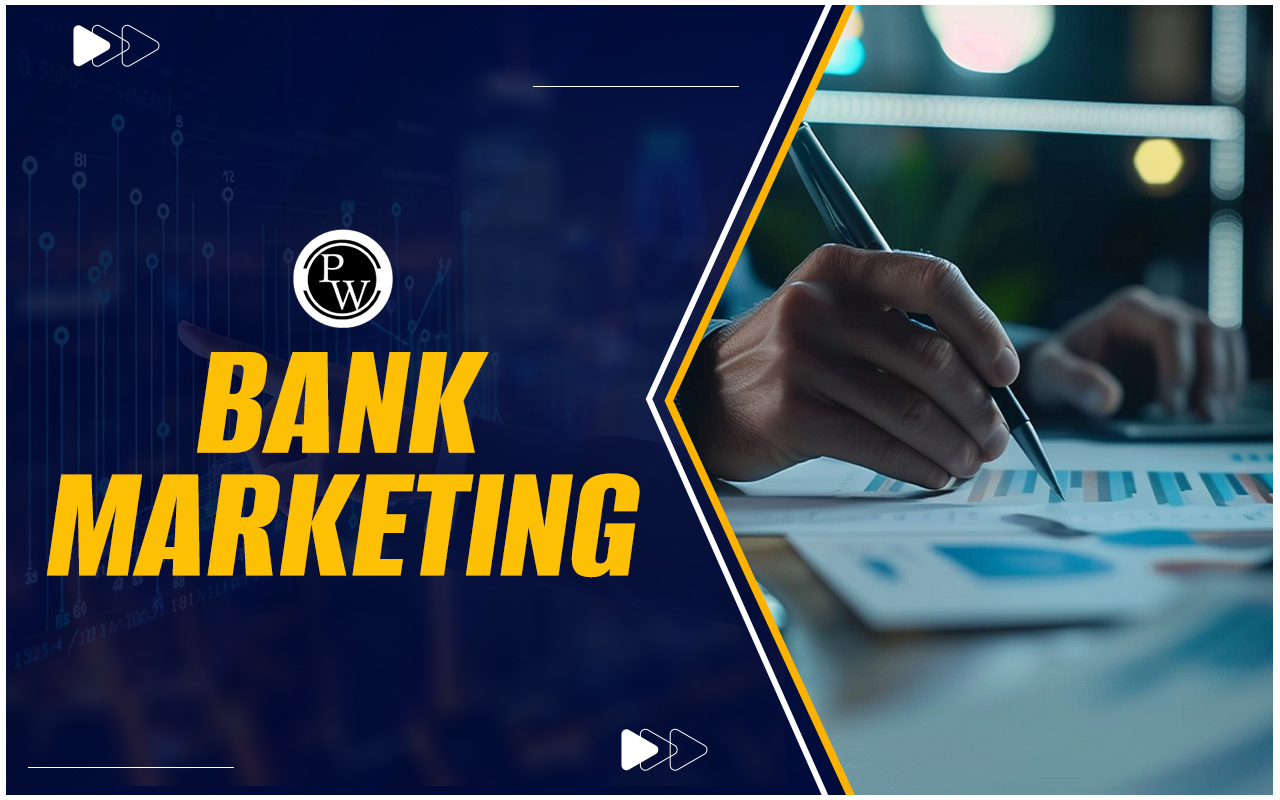

**IMPORT LIBRARIES**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix


**LOAD THE CSV FILE**

In [70]:
data=pd.read_csv("balanced_bank.csv.zip")

**CONVERT FILE INTO DATAFRAME**

In [71]:
df=pd.DataFrame(data)

In [72]:
(df.head())

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,34579,35,admin.,single,university.degree,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,446,42,technician,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,20173,36,admin.,married,university.degree,no,no,no,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,18171,37,admin.,married,high.school,no,yes,yes,telephone,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,30128,31,management,single,university.degree,no,yes,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no


In [73]:
(df.tail())


,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9275,28870,45,blue-collar,married,unknown,no,yes,no,cellular,apr,...,1,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,yes
9276,30452,60,admin.,married,university.degree,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
9277,28937,38,blue-collar,married,basic.9y,no,yes,no,cellular,apr,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
9278,16739,41,technician,single,university.degree,no,no,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
9279,16807,56,services,married,high.school,unknown,yes,no,telephone,jul,...,11,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


**FIND THE INFORMATION**

In [74]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9280 non-null   int64  
 1   age             9280 non-null   int64  
 2   job             9280 non-null   object 
 3   marital         9280 non-null   object 
 4   education       9280 non-null   object 
 5   default         9280 non-null   object 
 6   housing         9280 non-null   object 
 7   loan            9280 non-null   object 
 8   contact         9280 non-null   object 
 9   month           9280 non-null   object 
 10  day_of_week     9280 non-null   object 
 11  duration        9280 non-null   int64  
 12  campaign        9280 non-null   int64  
 13  pdays           9280 non-null   int64  
 14  previous        9280 non-null   int64  
 15  poutcome        9280 non-null   object 
 16  emp.var.rate    9280 non-null   float64
 17  cons.price.idx  9280 non-null   f

In [75]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**FIND THE SHAPE OF THE DATASET**

In [76]:
df.shape

(9280, 22)

## **DESCRIBE THE DATASET**

In machine learning, a dataset is a collection of data used to train, test, and validate algorithms and models, providing the necessary input and output for them to learn and improve.

In [77]:
df.describe()
df.isnull().sum()

,0
Unnamed: 0,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0


## **MISSING VALUES**`

issing Data is characterised by the appearance of absent values in some observations, and although all missing values may look the same for the untrained eye, the truth is that they may follow three main mechanisms: Missing Completely at Random (MCAR), Missing at Random (MAR), and Missing Not at Random (MNAR)

In [78]:
df.isnull()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9276,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9277,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## **HANDLING DUPLICATES**

To prepare data for machine learning, removing duplicate entries is crucial as they can lead to biased models and overfitting.

In [79]:
df.duplicated().sum()
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9275,False
9276,False
9277,False
9278,True


In [80]:
y=df['y']
y

,y
0,no
1,yes
2,yes
3,yes
4,no
...,...
9275,yes
9276,yes
9277,no
9278,no


In [81]:
x=df.drop('y',axis=1)

In [82]:
x.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [83]:
y=df['y']
y

,y
0,no
1,yes
2,yes
3,yes
4,no
...,...
9275,yes
9276,yes
9277,no
9278,no


In [84]:
x=df.drop('y',axis=1)

In [85]:
x.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [86]:
le = LabelEncoder()
y=le.fit_transform(y)

# **ENCODING**

n machine learning, encoding refers to the process of converting categorical or textual data into a numerical format, making it usable by algorithms that primarily work with numerical inputs

In [87]:
oh = OneHotEncoder()
df_pandas_encoded = pd.get_dummies(df,columns=['job', 'marital', 'education', 'housing','loan','month'], drop_first=True)
encoder = OneHotEncoder(sparse_output=False)
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
encoder=OneHotEncoder(sparse_output=False)
One_Hot_Encoder_Data=encoder.fit_transform(df[categorical_columns])
One_Hot_Encoder=encoder.fit_transform(df[categorical_columns])
One_Hot_df=pd.DataFrame(One_Hot_Encoder,columns=encoder.get_feature_names_out(categorical_columns))
df_sklearn_encoded=pd.concat([df.drop(categorical_columns,axis=1),One_Hot_df],axis=1)
print(f"One_Hot Encoded Data using scikit:\n{df_pandas_encoded.head()}")
df1=df_sklearn_encoded

One_Hot Encoded Data using scikit:
   Unnamed: 0  age default    contact day_of_week  duration  campaign  pdays  \
0       34579   35      no   cellular         thu       143         1    999   
1         446   42      no  telephone         tue      1623         1    999   
2       20173   36      no   cellular         mon       610         2    999   
3       18171   37      no  telephone         wed      1089         2    999   
4       30128   31      no   cellular         thu       211         1    999   

   previous     poutcome  ...  loan_yes  month_aug  month_dec  month_jul  \
0         1      failure  ...     False      False      False      False   
1         0  nonexistent  ...     False      False      False      False   
2         0  nonexistent  ...     False       True      False      False   
3         0  nonexistent  ...      True      False      False       True   
4         0  nonexistent  ...     False      False      False      False   

   month_jun month_mar  mon

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9280 non-null   int64  
 1   age                            9280 non-null   int64  
 2   duration                       9280 non-null   int64  
 3   campaign                       9280 non-null   int64  
 4   pdays                          9280 non-null   int64  
 5   previous                       9280 non-null   int64  
 6   emp.var.rate                   9280 non-null   float64
 7   cons.price.idx                 9280 non-null   float64
 8   cons.conf.idx                  9280 non-null   float64
 9   euribor3m                      9280 non-null   float64
 10  nr.employed                    9280 non-null   float64
 11  job_admin.                     9280 non-null   float64
 12  job_blue-collar                9280 non-null   f

## **OUTLIERS**

In machine learning, an outlier is a data point that is very different from the rest of the data in a dataset. Outliers can be caused by measurement errors, data entry mistakes, or rare events


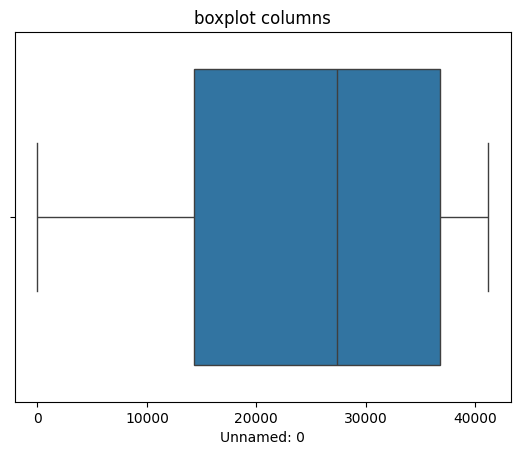

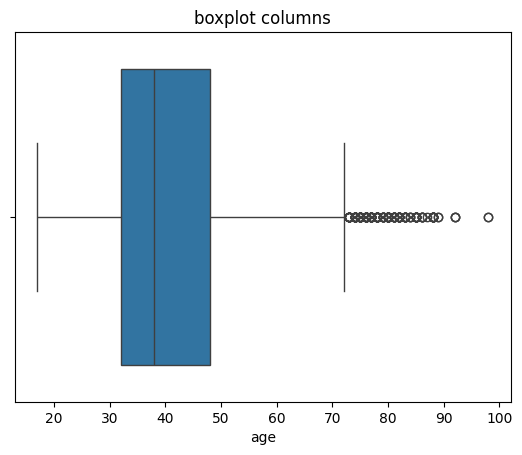

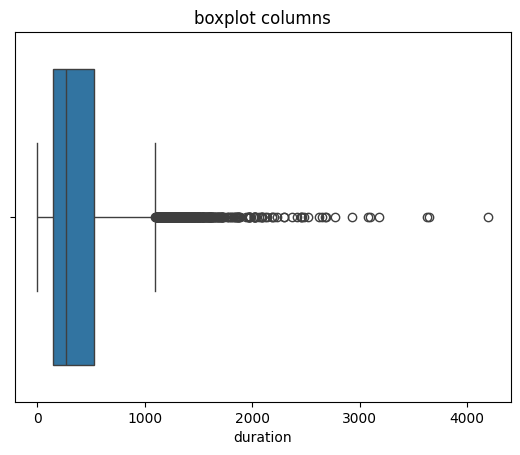

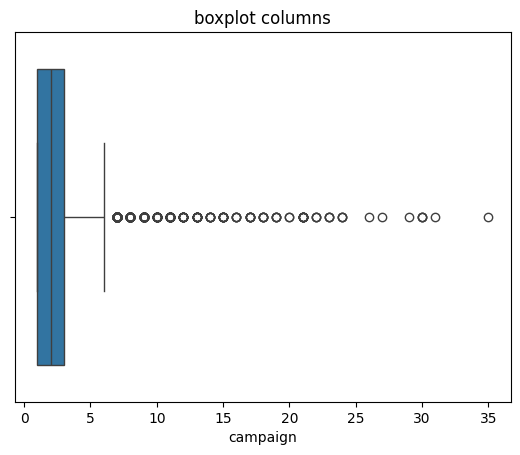

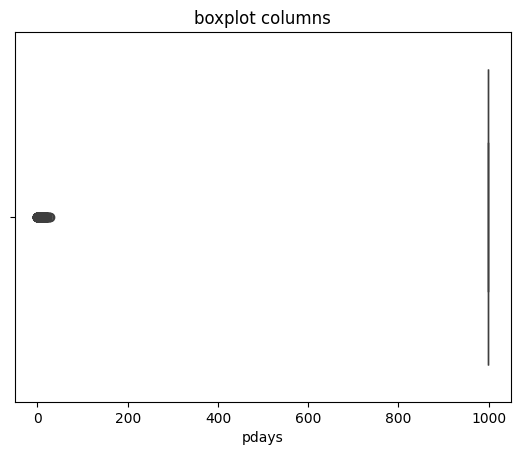

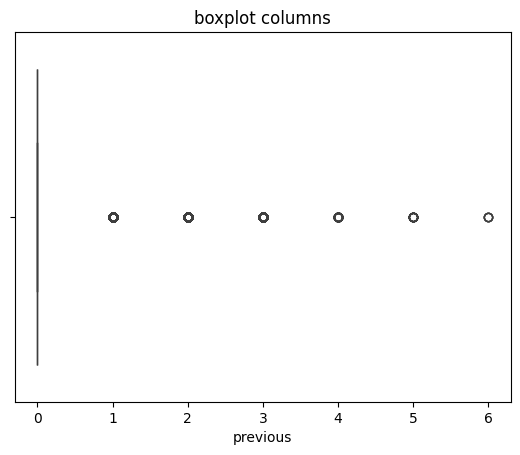

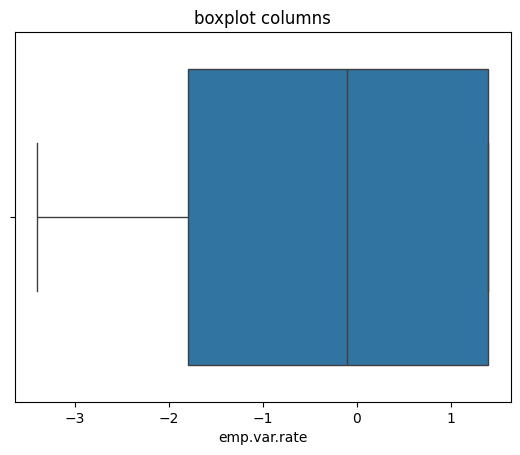

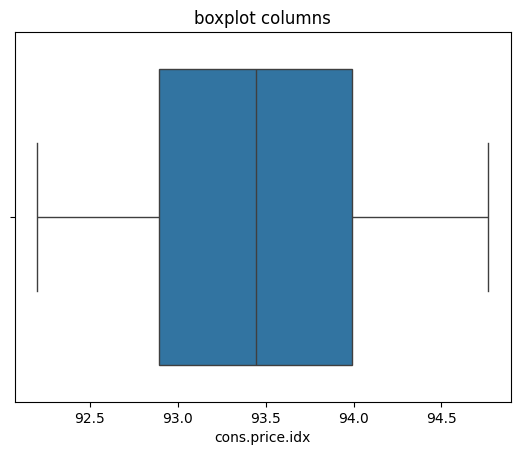

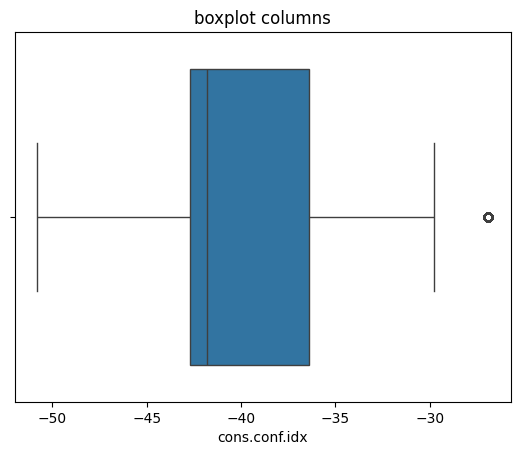

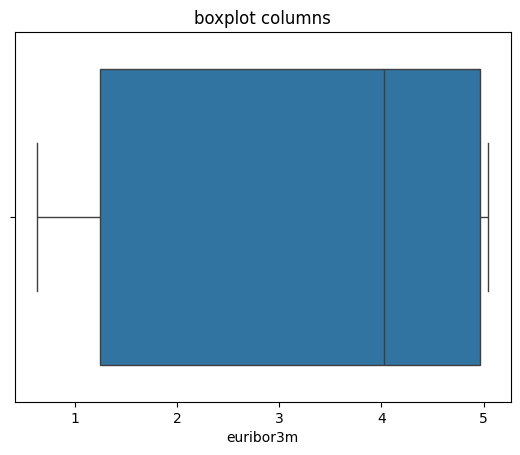

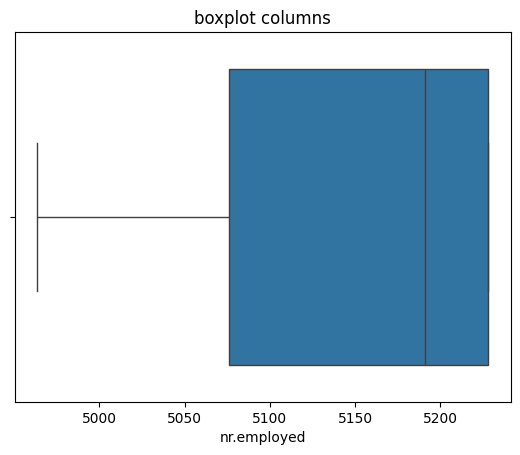

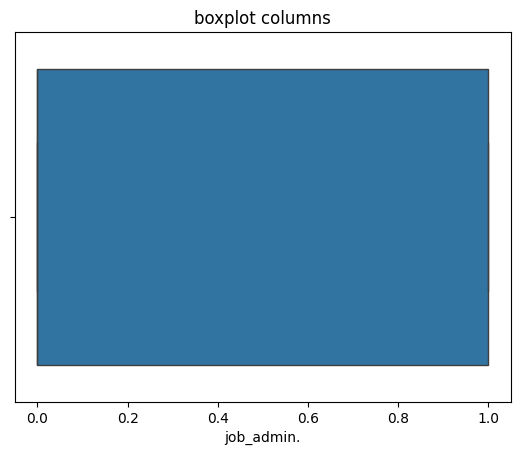

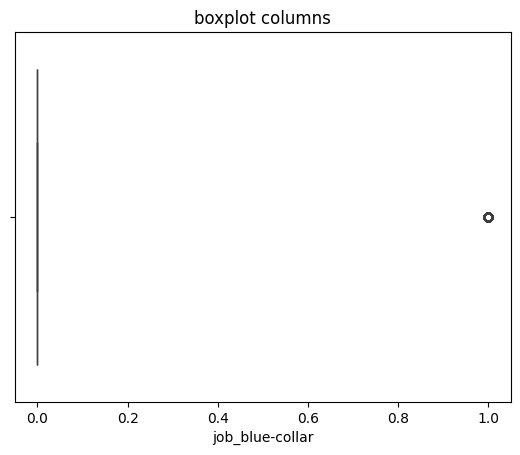

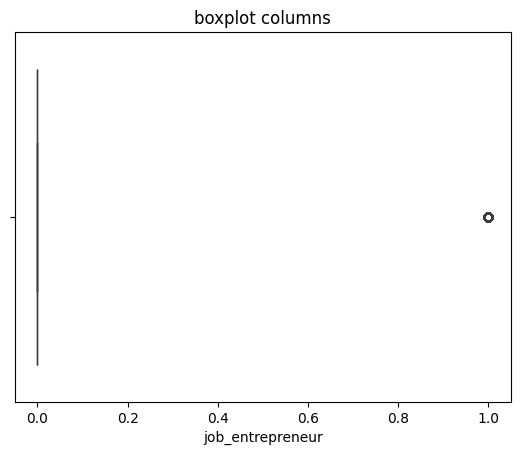

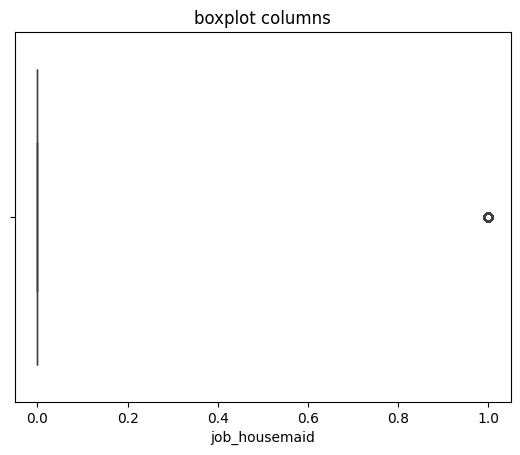

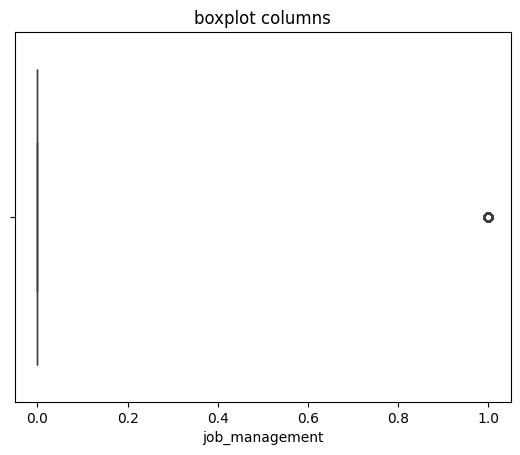

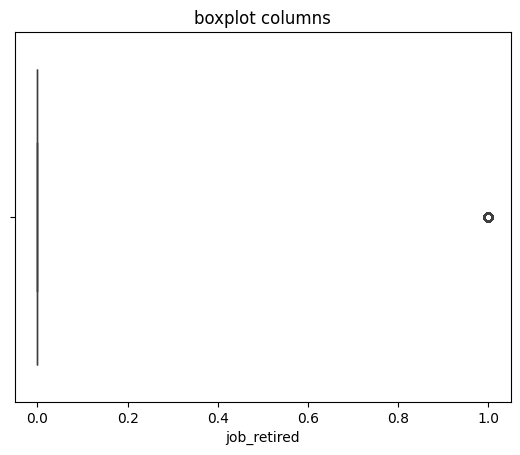

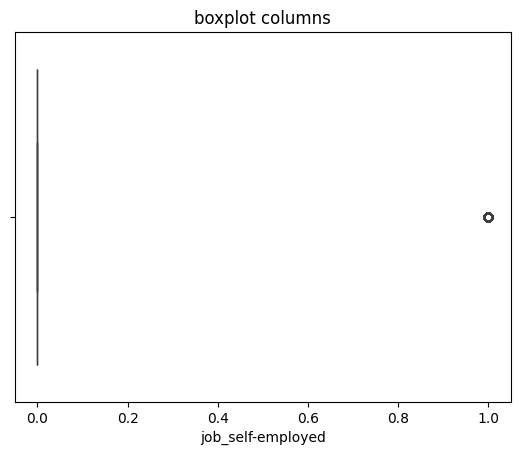

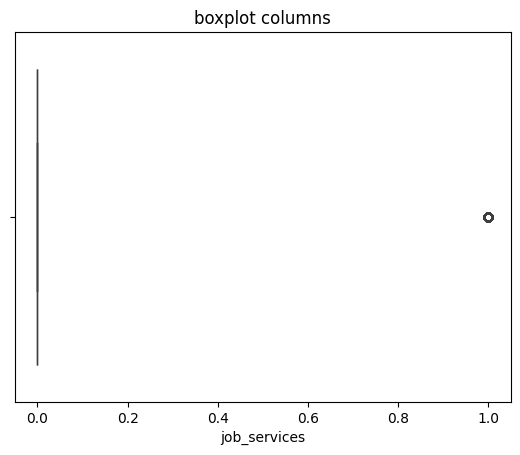

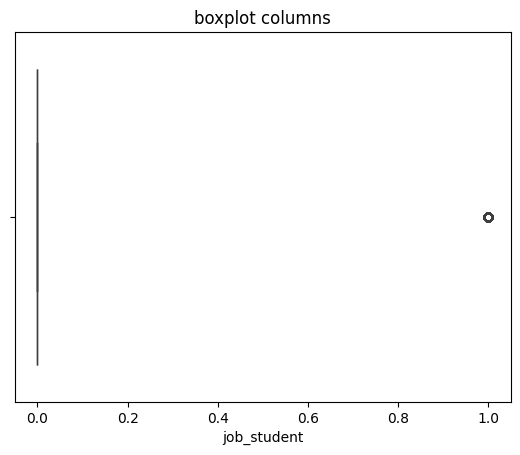

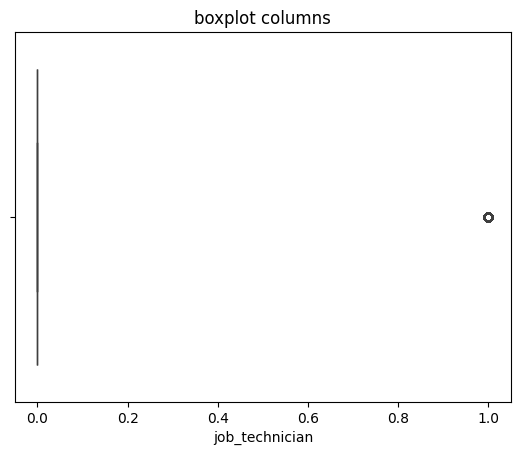

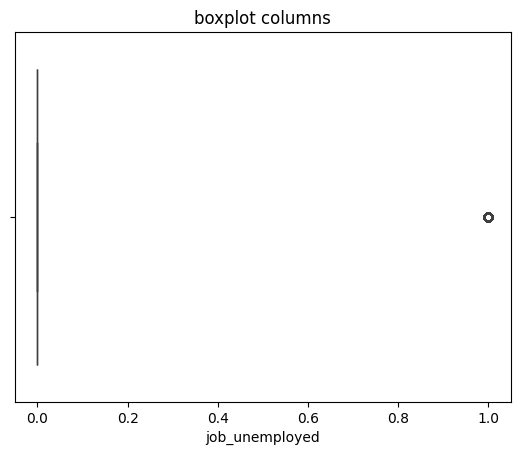

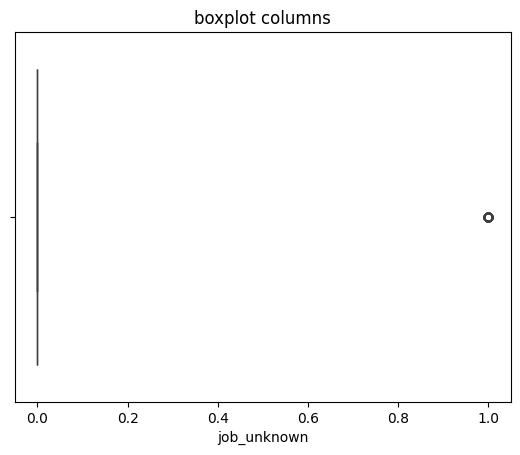

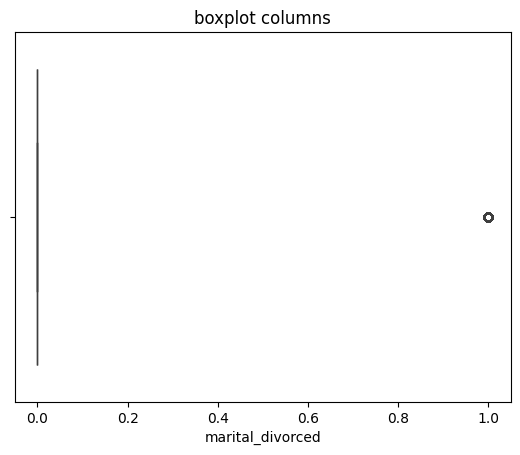

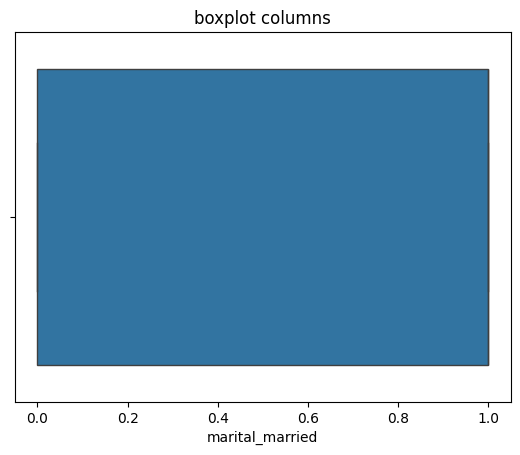

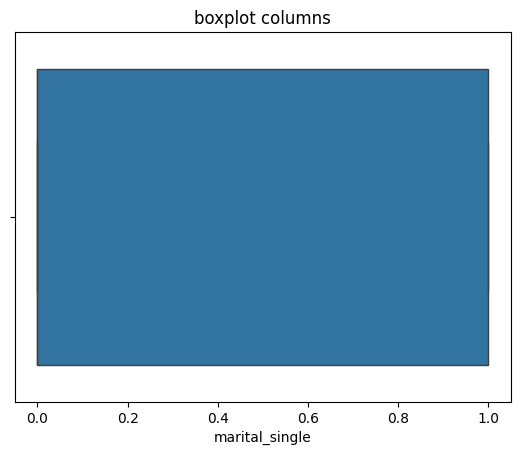

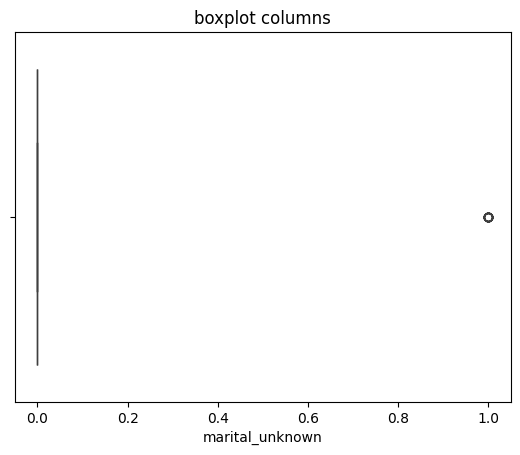

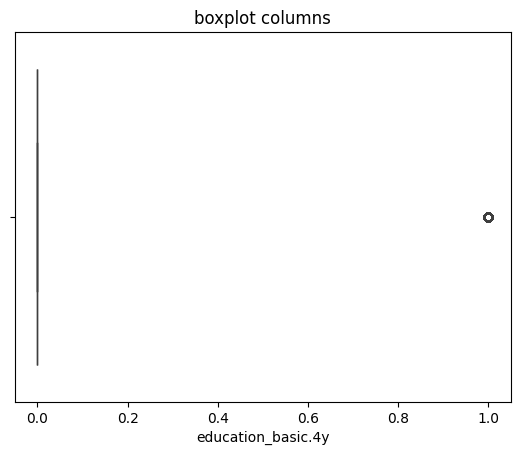

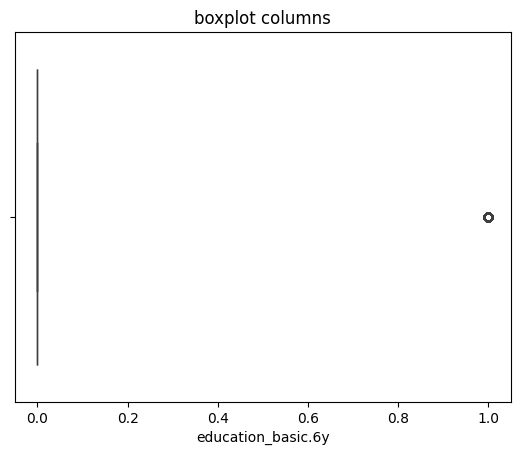

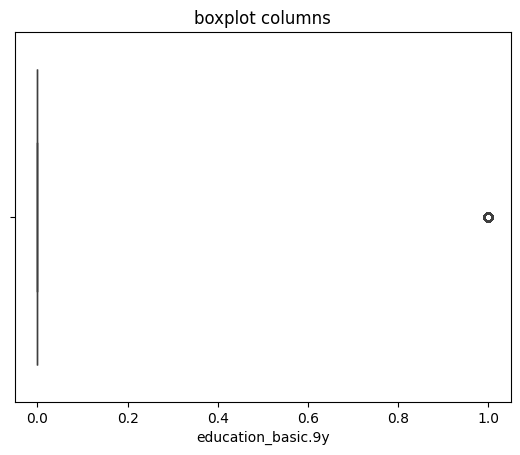

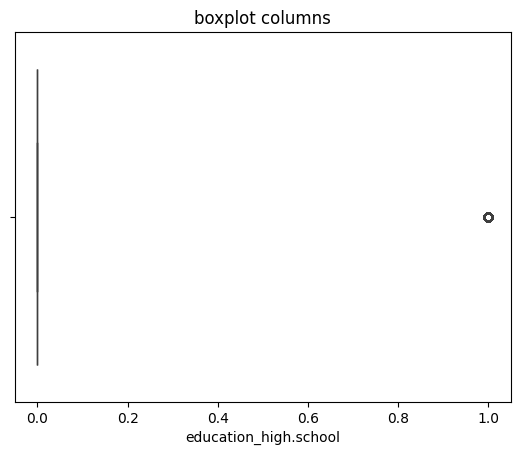

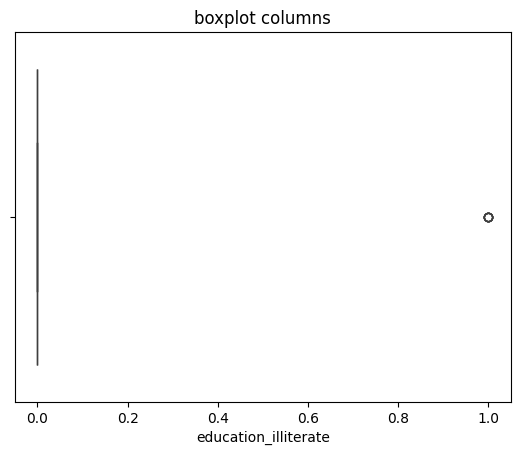

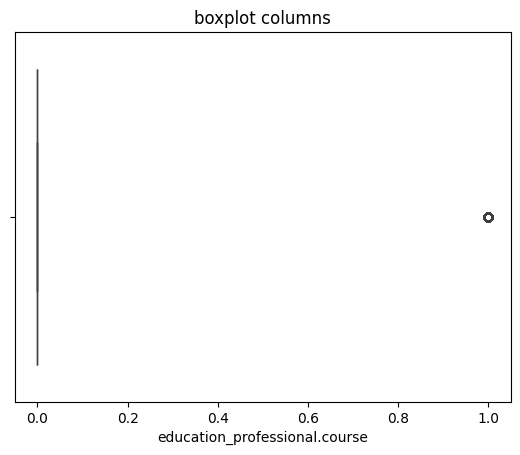

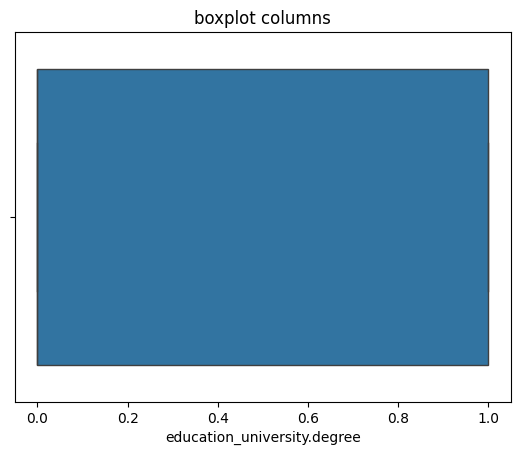

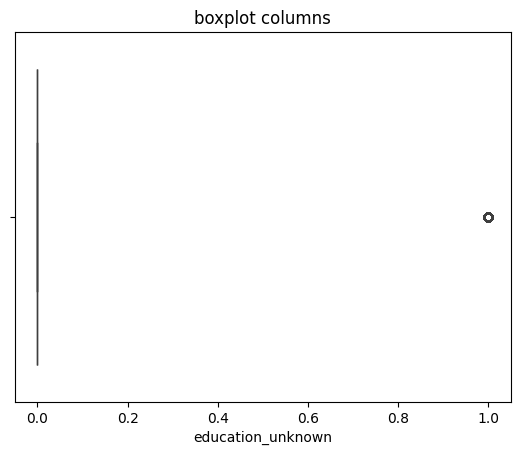

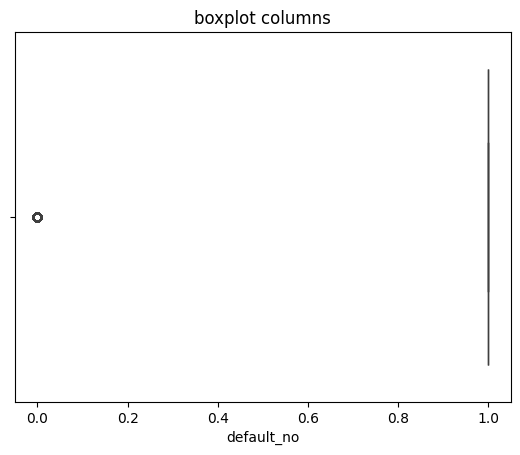

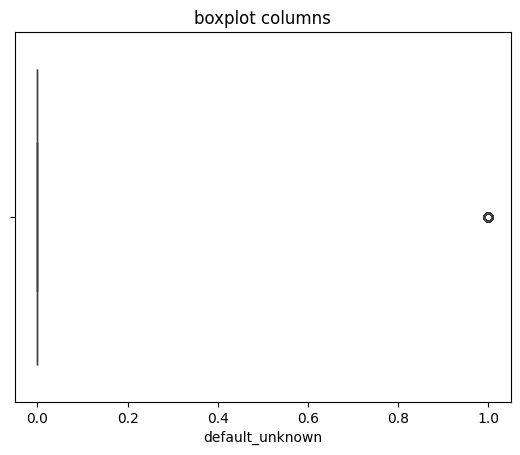

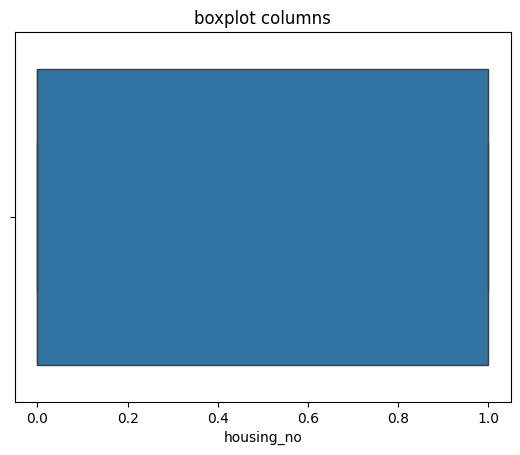

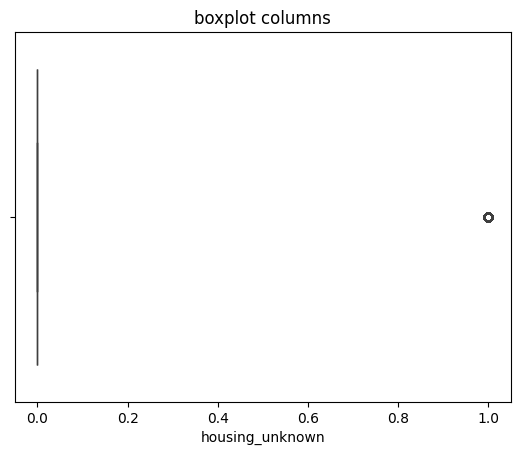

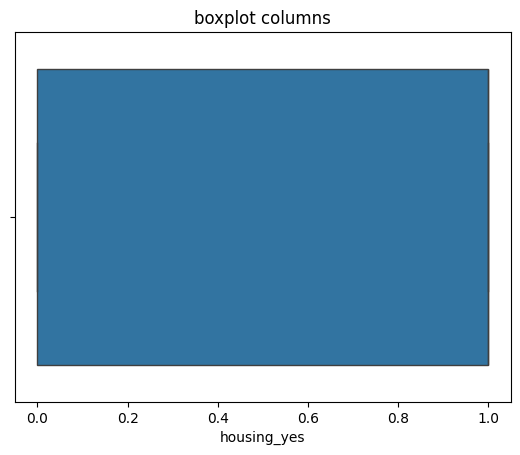

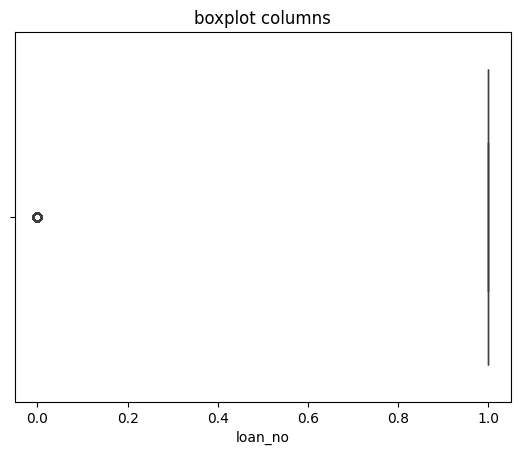

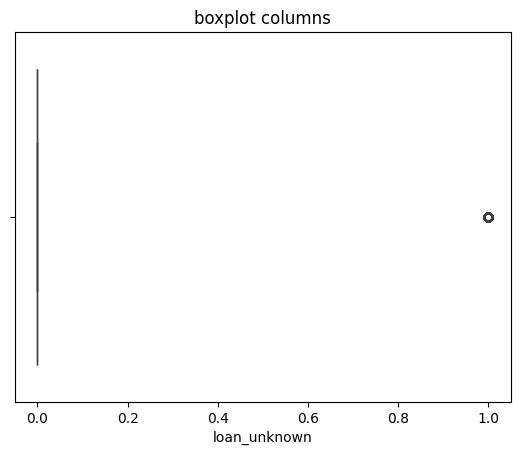

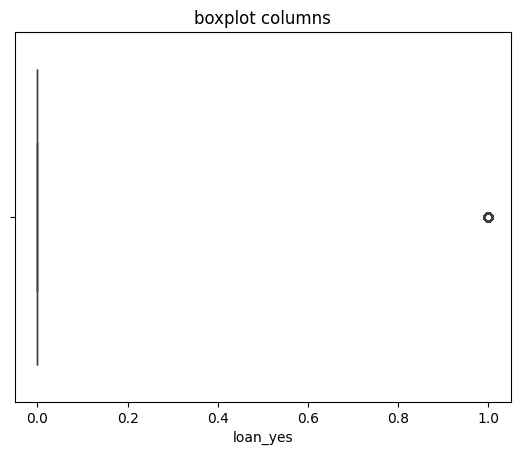

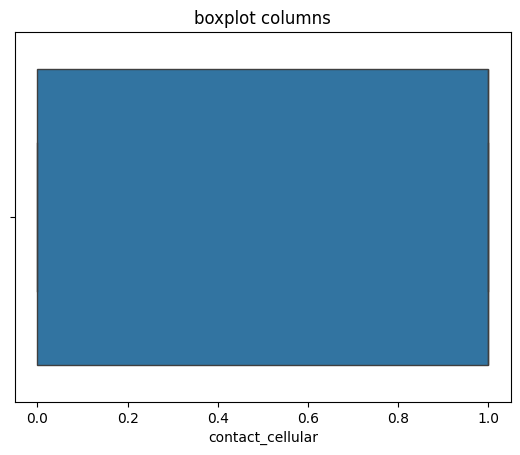

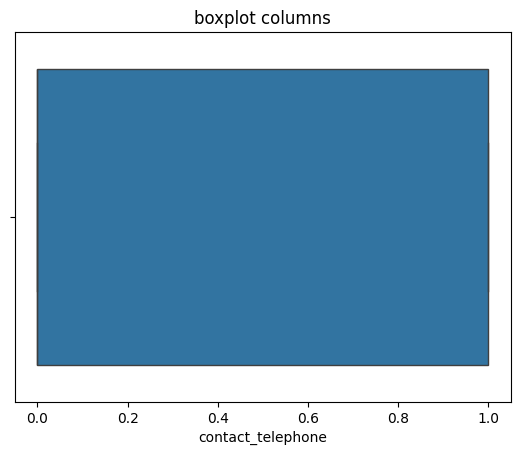

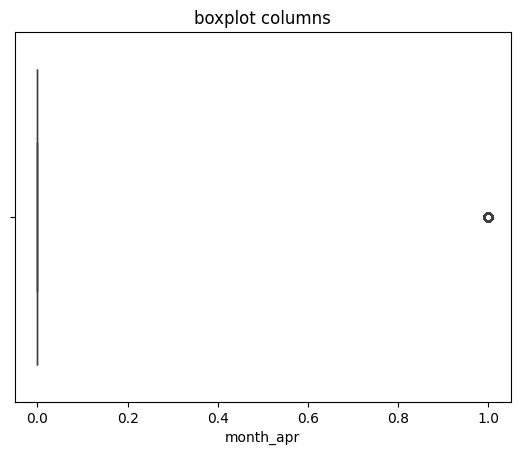

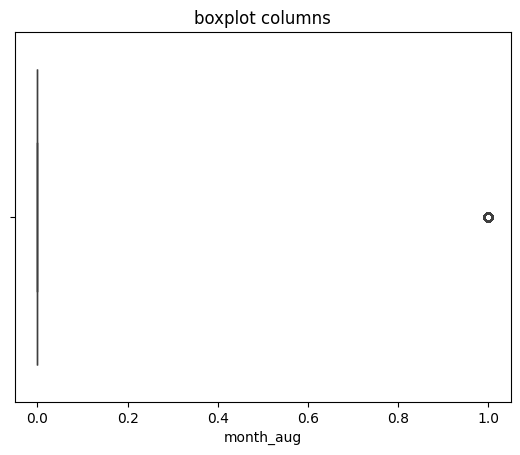

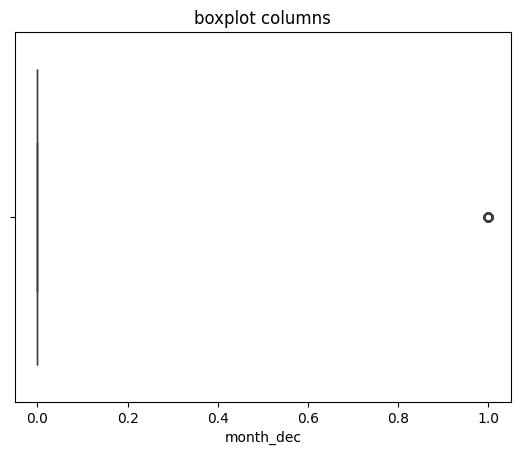

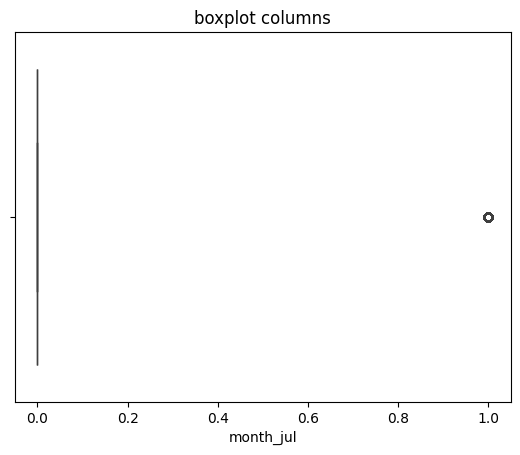

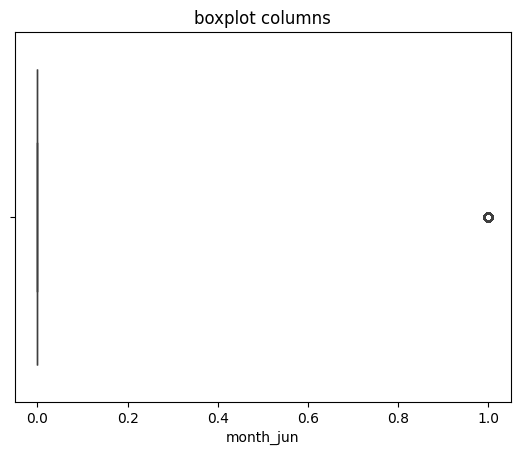

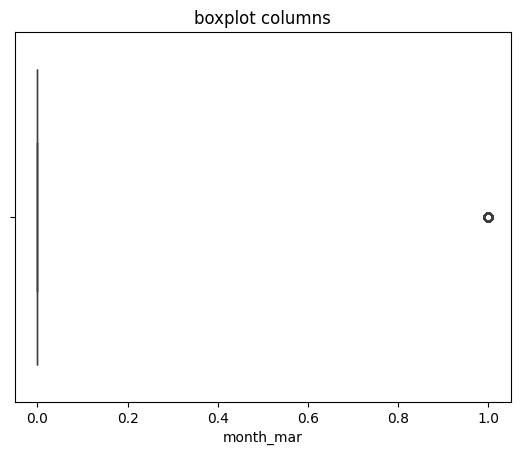

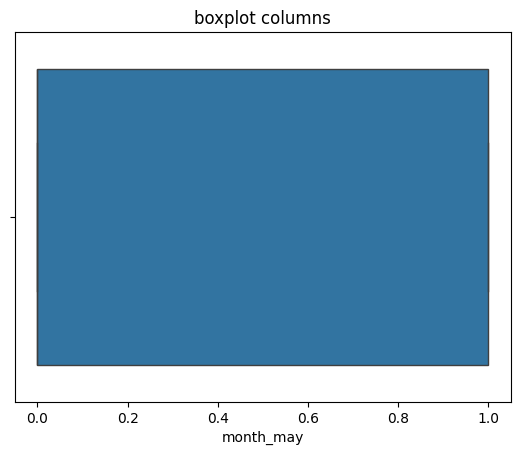

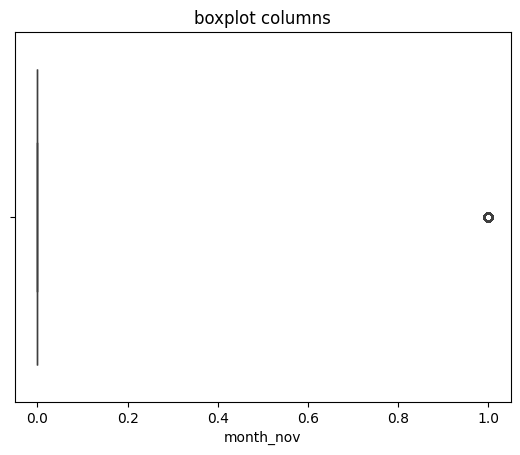

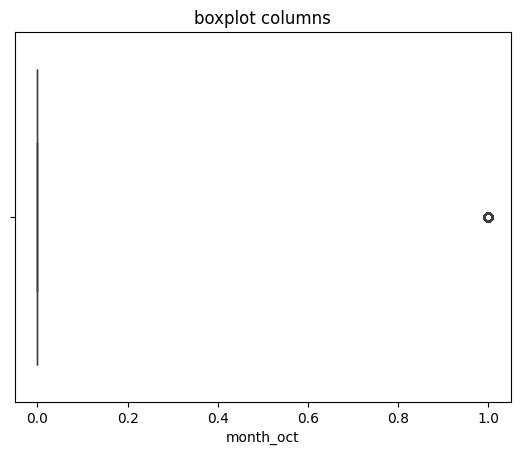

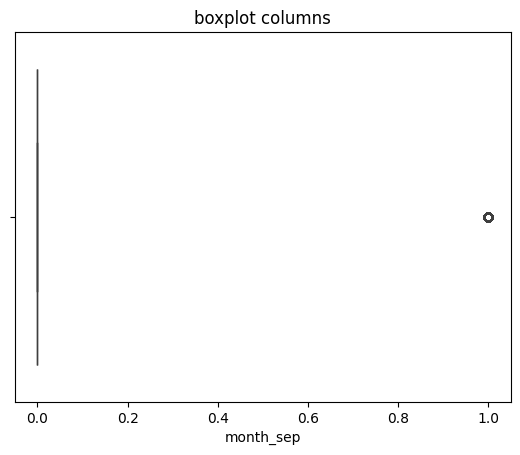

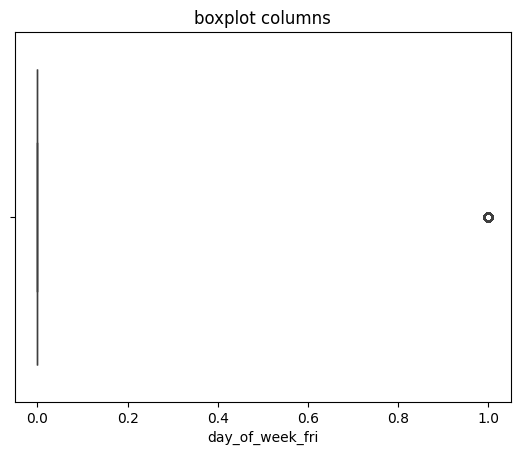

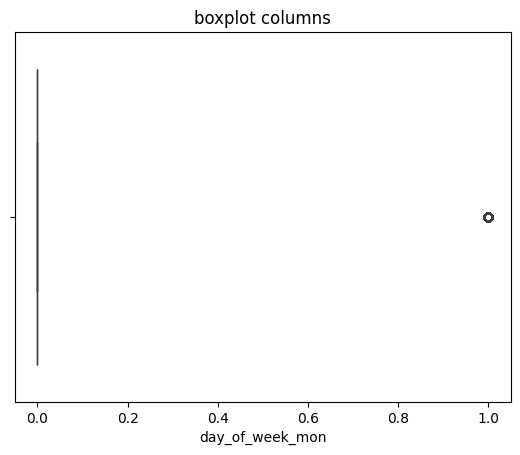

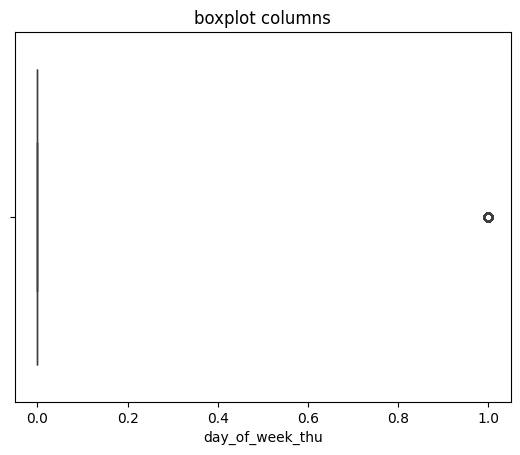

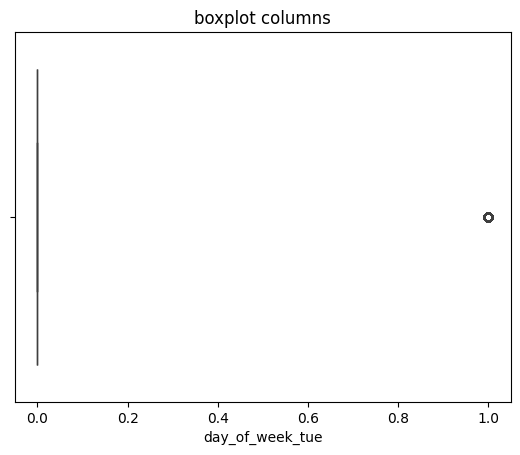

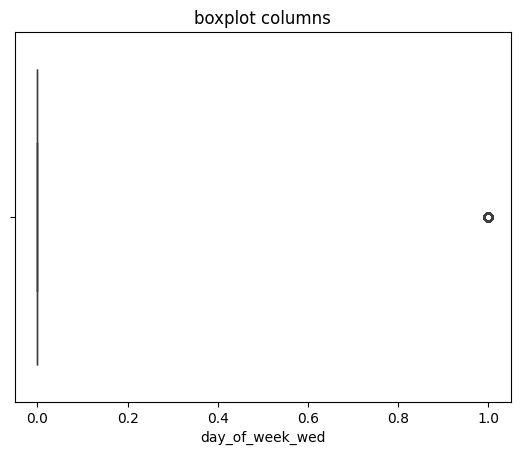

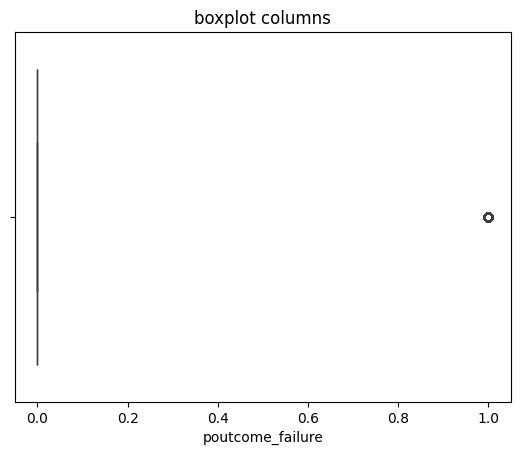

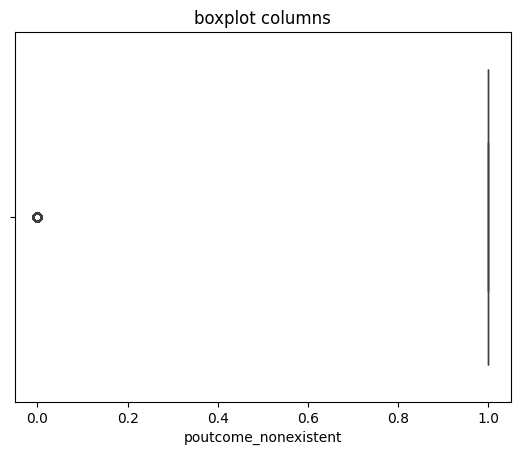

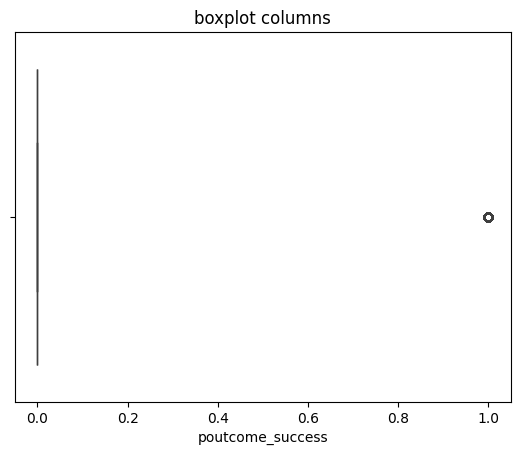

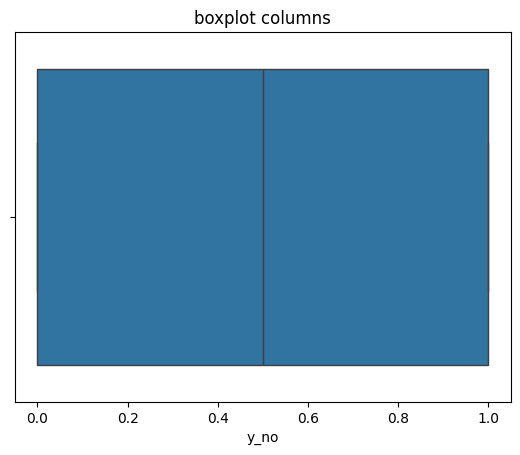

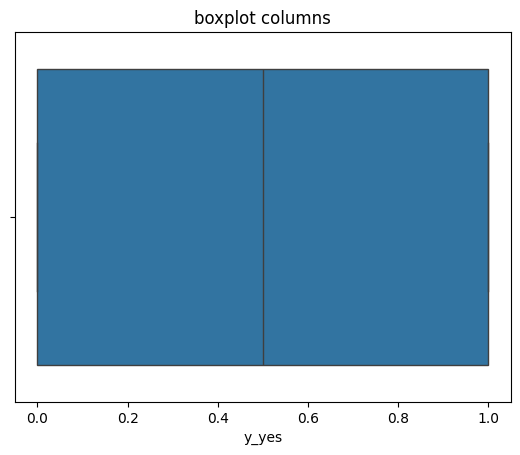

In [89]:
num_columns=df1.select_dtypes(include='number')
num_columns.head()
for columns in num_columns.columns:
  sns.boxplot(data=num_columns,x=columns)
  plt.title(f'boxplot columns')
  plt.show()
def handling_outliers(df):
  for column in df.select_dtypes(include='number').columns:
     Q1=df[columns].quantile(0.30)
     Q3=df[columns].quantile(0.80)
     IQR=Q3-Q1
def handling_outliers(df):
  for column in df.select_dtypes(include='number').columns:
     Q1=df[column].quantile(0.25)
     Q3=df[column].quantile(0.75)
     IQR=Q3-Q1
     lower_bound=Q1-1.5*IQR
     upper_bound=Q3+1.5*IQR
     df[column]=df[column].apply(lambda x : lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
  return df


<Axes: >

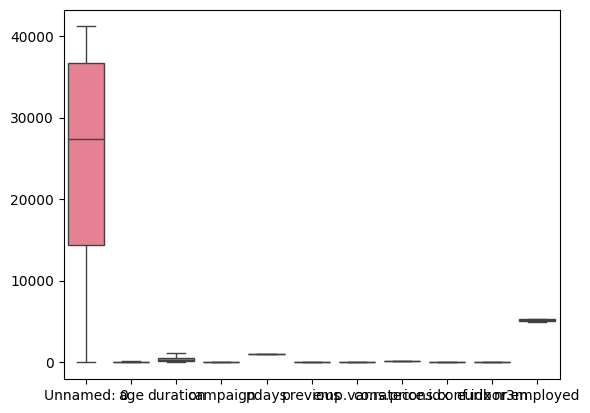

In [90]:
df1=handling_outliers(df)
df1.head()
sns.boxplot(df1)

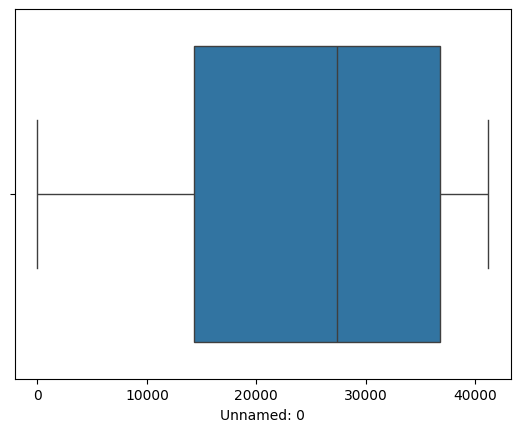

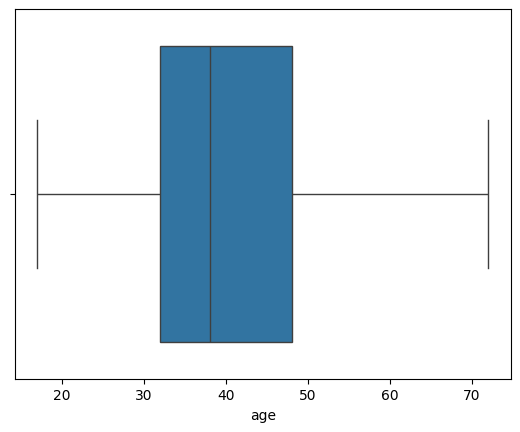

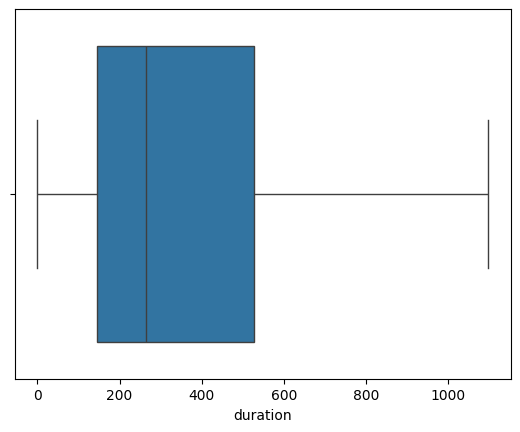

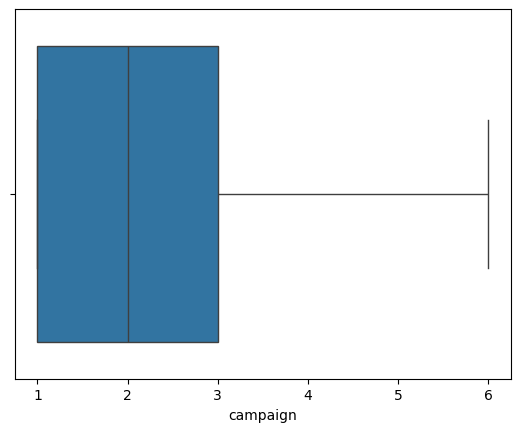

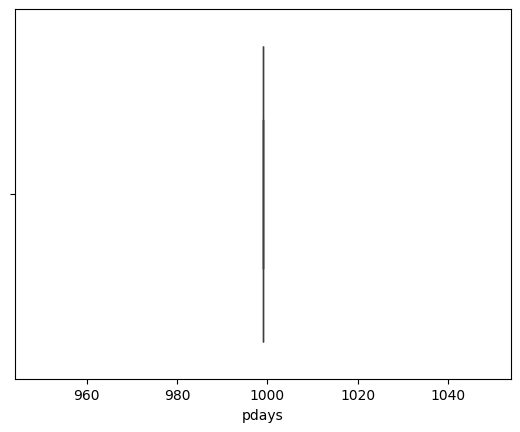

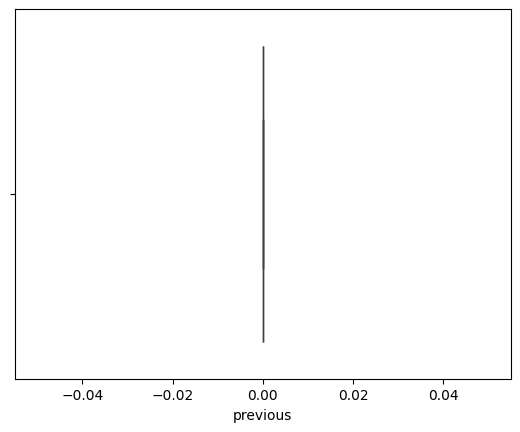

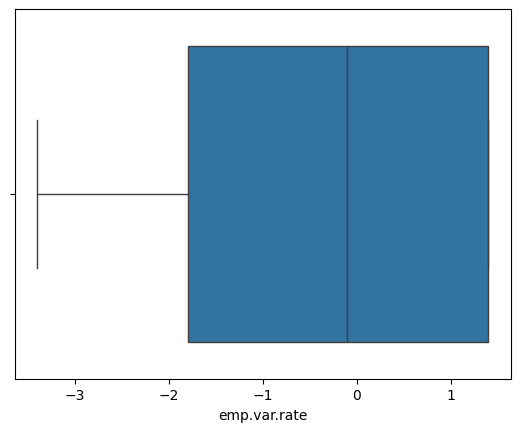

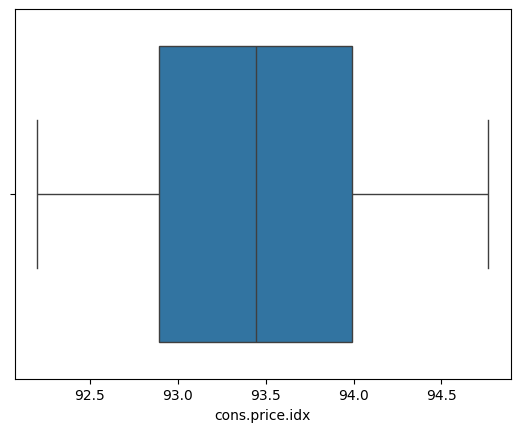

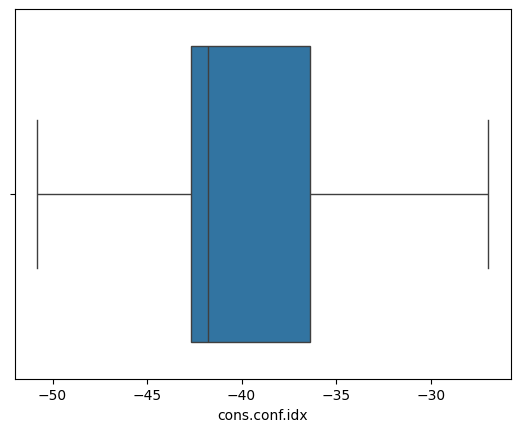

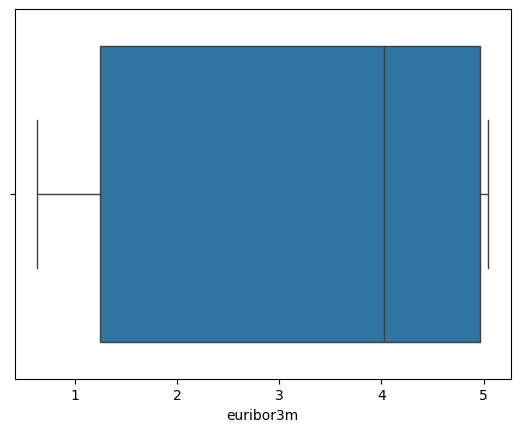

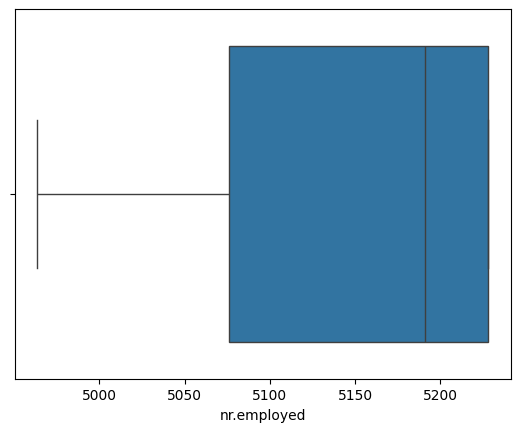

In [91]:
for column in df1.select_dtypes(include='number').columns: # Change num_columns to df1
  sns.boxplot(data=df1,x=column)
  plt.show()

### **VISUALIZATION**
he practice of representing machine learning models, data, and their relationships graphically or interactively to aid understanding and communication, making complex models and data more accessible.

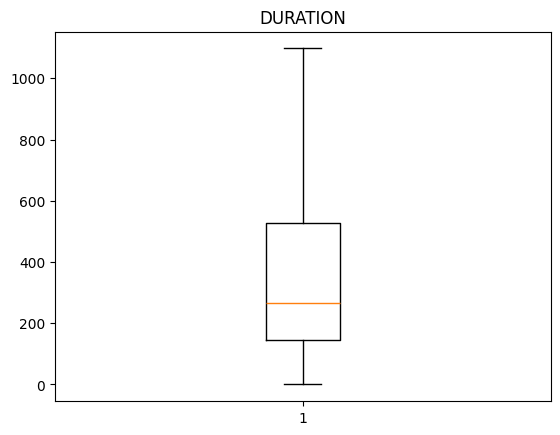

In [92]:
#BOX PLOT
x=df['duration']
plt.boxplot(x)
plt.title('DURATION')
plt.show()

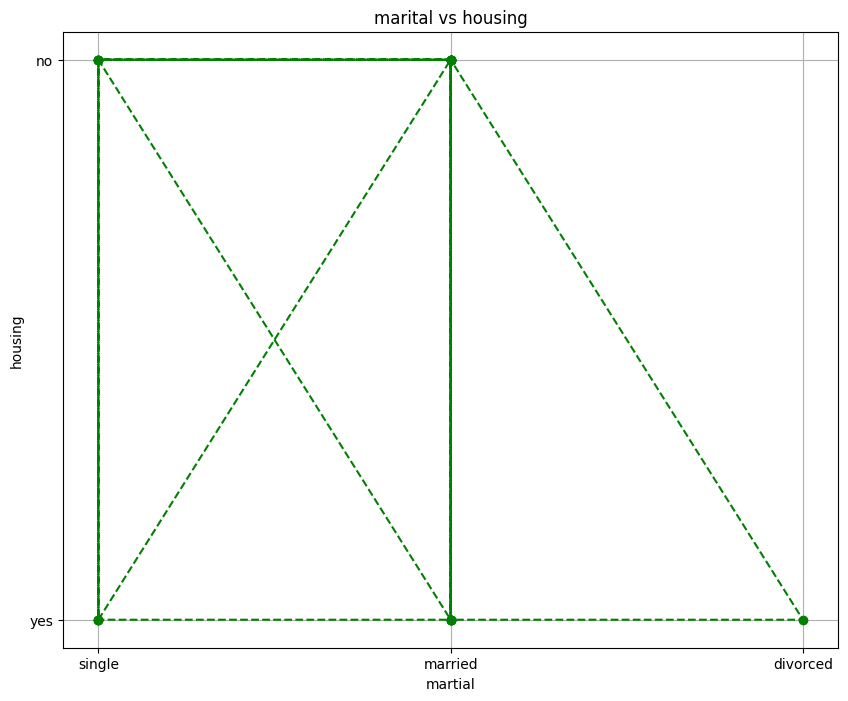

In [93]:
# LINE CHART
x=df['marital'].head(20)
y=df['housing'].head(20)
plt.figure(figsize=(10,8))
plt.plot(x,y,color ='green',marker='o',linestyle='--')
plt.title('marital vs housing')
plt.xlabel('martial')
plt.ylabel('housing')
plt.grid()
plt.show()


<ipython-input-94-31eda5d84a11>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


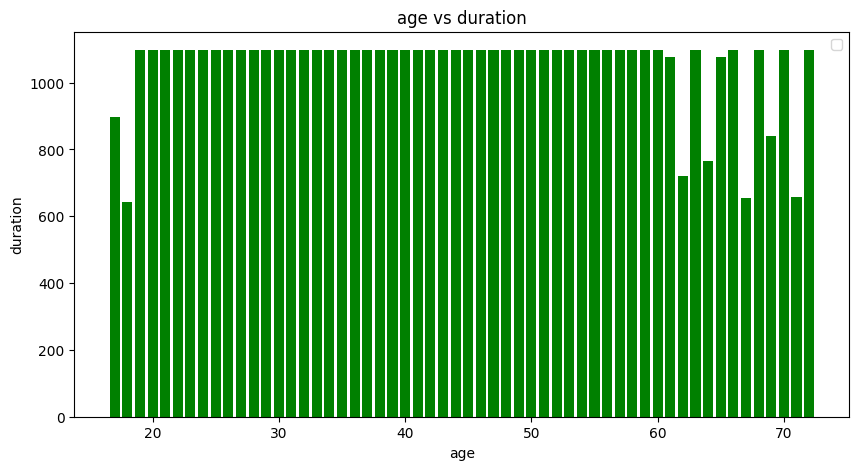

In [94]:
# BAR CHART
x=df['age']
y=df['duration']
plt.figure(figsize=(10,5))
plt.bar(x,y,color='green')
plt.title('age vs duration')
plt.xlabel('age')
plt.ylabel('duration')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

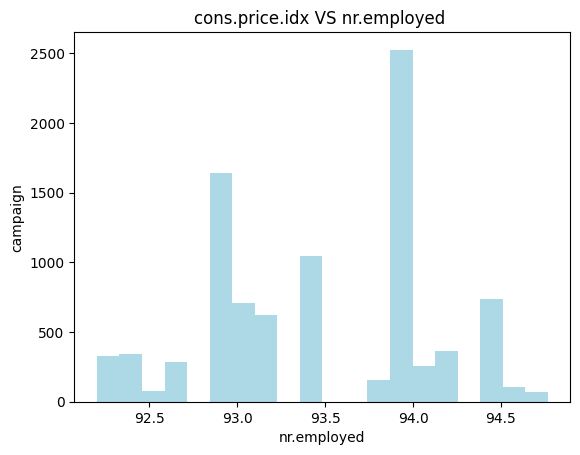

In [95]:
#HISTOGRAM
x=df['cons.price.idx']
plt.hist(x,bins=20,color='Lightblue')
plt.title('cons.price.idx VS nr.employed ')
plt.xlabel('nr.employed')
plt.ylabel('campaign')
plt.show


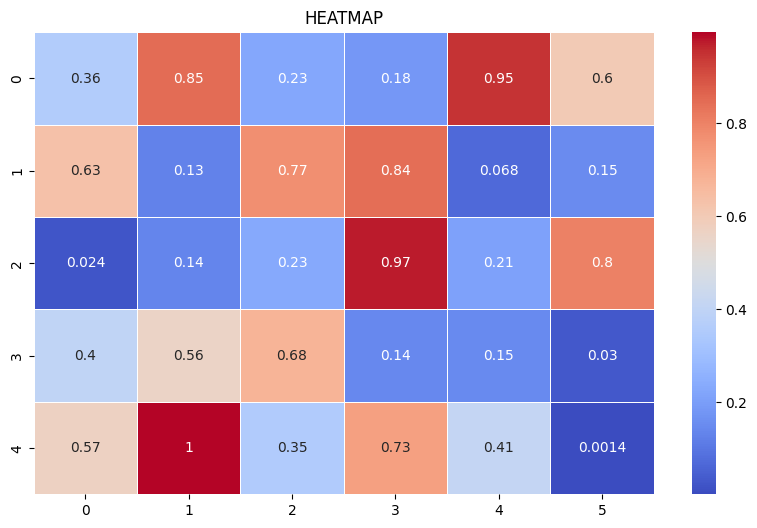

In [96]:
#HEAT MAP
data=np.random.rand(5,6)
plt.figure(figsize=(10,6))
sns.heatmap(data,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('HEATMAP')
plt.show()

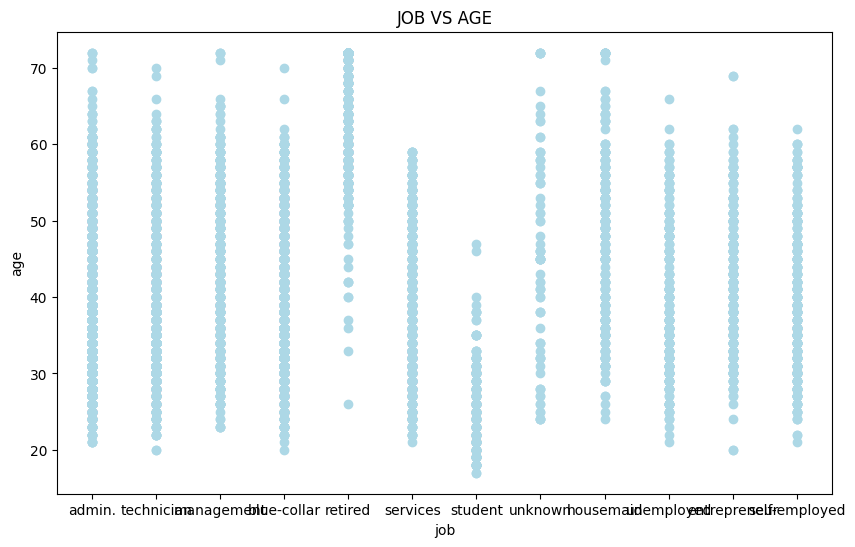

In [97]:
# SCATTER PLOT
x=df['job']
y=df['age']
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='Lightblue',marker='o')
plt.title('JOB VS AGE')
plt.xlabel('job')
plt.ylabel('age')
plt.show()

### **SKEWNESS**

skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

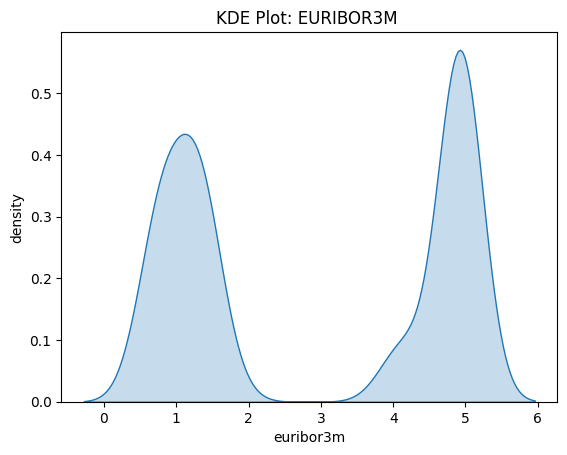

In [98]:
sns.kdeplot(x=df['euribor3m'],fill=True)
plt.xlabel('euribor3m')
plt.ylabel('density')
plt.title('KDE Plot: EURIBOR3M ')
plt.show()


### **FEATURE SELECTION**

Feature selection is a machine learning technique that chooses a subset of relevant features for building a model.

In [99]:
x = df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], axis=1)
y = df['y']
selecter = SelectKBest(score_func=f_classif, k=14)
x_new = selecter.fit_transform(x, y)
selected_features_num = x.columns[selecter.get_support()]
features_score = pd.DataFrame({'Features': selected_features_num, 'Scores': selecter.scores_[selecter.get_support()]})
features_score = features_score.sort_values(by='Scores', ascending=False)
print(features_score)
x_new = selecter.fit_transform(x, y)
selected_features_num = x.columns[selecter.get_support()]
features_score = pd.DataFrame({'Features': selected_features_num, 'Scores': selecter.scores_[selecter.get_support()]})
features_score = features_score.sort_values(by='Scores', ascending=False)
print(features_score)

         Features       Scores
1        duration  3210.582146
9     nr.employed  2547.229401
8       euribor3m  2315.606936
5    emp.var.rate  2102.543447
6  cons.price.idx   391.017578
2        campaign   119.878306
7   cons.conf.idx    49.802271
0             age     7.786355
3           pdays          NaN
4        previous          NaN
         Features       Scores
1        duration  3210.582146
9     nr.employed  2547.229401
8       euribor3m  2315.606936
5    emp.var.rate  2102.543447
6  cons.price.idx   391.017578
2        campaign   119.878306
7   cons.conf.idx    49.802271
0             age     7.786355
3           pdays          NaN
4        previous          NaN


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=14 is greater than n_features=10. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=14 is greater than n_features=10. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/u

### **TRAIN AND TEST SPLIT**

rain test split is a model validation procedure that splits a dataset into a training set and a testing set, which are used to determine how your model performs on new data.



In [100]:
x_selected=x[selected_features_num]
x_selected.columns
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7424, 10)
(1856, 10)
(7424,)
(1856,)


## **SCALING**

scaling involves transforming numerical features to a common scale, ensuring all features contribute equally to model training and performance, especially for algorithms sensitive to feature magnitudes.

In [101]:
Ss = StandardScaler()
x_test_scaled = Ss.fit_transform(x_test)
x_train_scaled = Ss.fit_transform(x_train)

### **MODEL BULDING**

Building a machine learning model involves several key steps, including defining the problem, collecting and preparing data, selecting an appropriate algorithm, training the model, evaluating its performance, and deploying it for real-world us

In [102]:
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'Random Forest Classifier':RandomForestClassifier()
}
for name,clf in classifiers.items():
  clf.fit(x_train_scaled,y_train)
  y_pred=clf.predict(x_test_scaled)
  print(f"\n {name} results:")
  print("accuracy:",accuracy_score(y_test,y_pred))
  print("confusion matrix:\n")
  print(confusion_matrix(y_test,y_pred))
  print("classification report:\n")
  print(classification_report(y_test,y_pred))


 Logistic Regression results:
accuracy: 0.8480603448275862
confusion matrix:

[[788 169]
 [113 786]]
classification report:

              precision    recall  f1-score   support

          no       0.87      0.82      0.85       957
         yes       0.82      0.87      0.85       899

    accuracy                           0.85      1856
   macro avg       0.85      0.85      0.85      1856
weighted avg       0.85      0.85      0.85      1856


 Decision Tree Classifier results:
accuracy: 0.8216594827586207
confusion matrix:

[[780 177]
 [154 745]]
classification report:

              precision    recall  f1-score   support

          no       0.84      0.82      0.82       957
         yes       0.81      0.83      0.82       899

    accuracy                           0.82      1856
   macro avg       0.82      0.82      0.82      1856
weighted avg       0.82      0.82      0.82      1856


 SVC results:
accuracy: 0.8787715517241379
confusion matrix:

[[789 168]
 [ 57 842]]
cla

In [103]:
print("The Best Model is : Logistic Regression ")

The Best Model is : Logistic Regression 
